In [1]:
import nltk # Natural Language Toolkit
nltk.download('punkt') # Download the punkt tokenizer
nltk.download('wordnet') # Download the wordnet lemmatizer
from nltk import sent_tokenize, word_tokenize   # Tokenizer
from nltk.stem.snowball import SnowballStemmer # Stemmer
from nltk.stem.wordnet import WordNetLemmatizer # Lemmatizer
from nltk.corpus import stopwords # Stopwords
import pandas as pd
import numpy as np 
import re   # Regular expressions
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

[nltk_data] Downloading package punkt to /Users/cindydunn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cindydunn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## i have
- so i figured out how to webscrape and clean the tweets now we need to pick a list of top new sources and a given time period of tweets to pull and then we can start to do some analysis.
- figured out how to pull virality metrics from the tweets. things link likes shares reports etc. and followr count at time of tweet should help me normalize the data

## what i need to do
- i will also need to figure out how to normalize these metrics based on the number of followers the account has.

In [2]:
#list of news accounts to scrape
news_accounts = ['BBCBreaking', 'cnnbrk', 'CNBCnow', 'FoxNews', 'CBSNews', 'SkyNews', 'gmanewsbreaking']

#get todays date
from datetime import date
today = date.today()

#get the date 7 days ago
from datetime import datetime, timedelta
seven_days_ago = datetime.now() - timedelta(days=7)

today = today.strftime("%Y-%m-%d")
seven_days_ago = seven_days_ago.strftime("%Y-%m-%d")
print(today)
print(seven_days_ago)

#generate a list of stings of news accounts and todays date and 7 days ago
news_accounts_and_dates = []
for account in news_accounts:
    news_accounts_and_dates.append('(from:' + account + ") until:" + today + " since:" + seven_days_ago)

print(news_accounts_and_dates[0])

#scrape the tweets for each account given the list of strings
import snscrape.modules.twitter as sntwitter
import pandas as pd
tweets = []
limit = 5000

for i in range(len(news_accounts_and_dates)):
    for tweet in sntwitter.TwitterSearchScraper(news_accounts_and_dates[i]).get_items():
    
        # print(vars(tweet))
        # break
        if len(tweets) == limit:
            break
        else:
            tweets.append([tweet.date, tweet.user.username, tweet.likeCount, tweet.user.followersCount, tweet.retweetCount, tweet.content])


2022-10-12
2022-10-05
(from:BBCBreaking) until:2022-10-12 since:2022-10-05


In [3]:
# #untoched code that works for scraping one twitter account
# import snscrape.modules.twitter as sntwitter
# import pandas as pd



# query = "(from:elonmusk) until:2020-01-01 since:2010-01-01"
# tweets = []
# limit = 5000


# for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
#     # print(vars(tweet))
#     # break
#     if len(tweets) == limit:
#         break
#     else:
#         tweets.append([tweet.date, tweet.user.username, tweet.likeCount, tweet.user.followersCount, tweet.retweetCount, tweet.content])
        

In [4]:
df = pd.DataFrame(tweets)
df.columns = ['date', 'username', 'likes', 'followers', 'retweets', 'content']
print(df)

                          date         username  likes  followers  retweets  \
0    2022-10-11 19:52:57+00:00      BBCBreaking   4779   51309950      1031   
1    2022-10-11 17:07:29+00:00      BBCBreaking   4725   51309950       860   
2    2022-10-11 06:44:54+00:00      BBCBreaking   1352   51309950       494   
3    2022-10-11 06:41:01+00:00      BBCBreaking    637   51309950       135   
4    2022-10-10 10:28:49+00:00      BBCBreaking   1522   51309950       413   
...                        ...              ...    ...        ...       ...   
3433 2022-10-07 06:15:04+00:00  gmanewsbreaking     12    1720925        10   
3434 2022-10-05 11:18:30+00:00  gmanewsbreaking      1    1720925         0   
3435 2022-10-05 11:17:40+00:00  gmanewsbreaking      5    1720925         1   
3436 2022-10-05 06:46:30+00:00  gmanewsbreaking     23    1720925        12   
3437 2022-10-05 05:40:29+00:00  gmanewsbreaking     18    1720925         4   

                                                con

In [5]:
# for each word in the column 'Tweet' create a new column with the words in a list
df['list_of_words_in_tweet'] = df['content'].str.split()
# print(df['list_of_words_in_tweet'][3])

# remove any punctuation from the words in the list
df['list_of_words_in_tweet'] = df['list_of_words_in_tweet'].apply(lambda x: [re.sub(r'[^A-Za-z0-9]+','',word) for word in x])
# print(df['list_of_words_in_tweet'][3])

# remove any empty strings from the list
df['list_of_words_in_tweet'] = df['list_of_words_in_tweet'].apply(lambda x: [word for word in x if word != ''])
# print(df['list_of_words_in_tweet'][3])

#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

#stem each word in the list
df['list_of_words_in_tweet'] = df['list_of_words_in_tweet'].apply(lambda x: [s_stemmer.stem(word) for word in x])
# print(df['list_of_words_in_tweet'][3])

#convert the list of words back to a string with underscores between the words
df['list_of_words_in_tweet'] = df['list_of_words_in_tweet'].apply(lambda x: '_'.join(x))
# print('content')
# print(df['list_of_words_in_tweet'][1])




In [6]:
# #get the frequency of each word in the list
# from nltk.probability import FreqDist

# freqdoctor = FreqDist()
# for lines in df['list_of_words_in_tweet']:
#     for words in lines:
#         freqdoctor[words] += 1

# freqdoctor

## create and connect to a SQLlite database

In [11]:
#connect to SQLlite database
import sqlite3
conn = sqlite3.connect('test.db') #create a database called test.db
c = conn.cursor() #create a cursor object

# check if table exists
listOfTables = c.execute(
  """SELECT name FROM sqlite_master WHERE type='table'
  AND name='twitter_accounts'; """).fetchall()
 
if listOfTables == []:
    print('Table not found!')
    #create a new table in the database called twitter_accounts with a primary key called user_id that is an integer and a column called username that is a string
    c.execute('''CREATE TABLE twitter_accounts
                (user_id integer primary key, username text)''')
else:
    print('Table found!')

#make a dataframe with each unquie twitter account
df_accounts = df['username'].unique()
df_accounts = pd.DataFrame(df_accounts, columns=['username'])
#insert the username and user_id into the table from the dataframe
for index, row in df_accounts.iterrows():
    c.execute("INSERT INTO twitter_accounts VALUES (?, ?)", (index, row['username']))
#print out the table
c.execute("SELECT * FROM twitter_accounts")
print("users in the database:")
print(c.fetchall())

#make a new table called tweets that has a primary key called tweet_id that is an integer and a column called content that is a string and a column foreign key called user_id that is an integer and a column called date that is a string and a column called likes that is an integer and a column called followers that is an integer and a column called retweets that is an integer
c.execute('''CREATE TABLE tweets
                (tweet_id integer primary key, content text, user_id integer, date text, likes integer, followers integer, retweets integer, FOREIGN KEY (user_id) REFERENCES twitter_accounts(user_id))''') 

#change the structure of df
# make a new column called user_id that is the index of the username in the df_accounts dataframe
df['user_id'] = df['username'].apply(lambda x: df_accounts[df_accounts['username'] == x].index[0])
#convert the date column to a string
df['date'] = df['date'].apply(lambda x: str(x))

#insert the content, user_id, date, likes, followers, and retweets into the table from the dataframe
for index, row in df.iterrows():
    c.execute("INSERT INTO tweets VALUES (?, ?, ?, ?, ?, ?, ?)", (index, row['list_of_words_in_tweet'], row['user_id'], row['date'], row['likes'], row['followers'], row['retweets']))

#print out the table
c.execute("SELECT * FROM tweets")
print("tweets in the database:")
print(c.fetchall())

c.close()


Table found!
users in the database:
[(0, 'BBCBreaking'), (1, 'cnnbrk'), (2, 'CNBCnow'), (3, 'FoxNews'), (4, 'CBSNews'), (5, 'SkyNews'), (6, 'gmanewsbreaking')]
tweets in the database:
[(0, 'angela_lansburi_star_of_the_us_tv_crime_seri_murder_she_wrote_die_age_96_httpstco6r9ukx2hpg', 0, '2022-10-11 19:52:57+00:00', 4779, 51309950, 1031), (1, 'king_charl_iii_coron_will_be_on_saturday_6_may_next_year_with_camilla_the_queen_consort_crown_alongsid_him_buckingham_palac_say_httpstcoupr7arfpht', 0, '2022-10-11 17:07:29+00:00', 4725, 51309950, 860), (2, 'bank_of_england_step_in_again_to_tri_to_calm_market_after_warn_of_materi_risk_to_uk_financi_stabil_httpstcog94eosz8pt', 0, '2022-10-11 06:44:54+00:00', 1352, 51309950, 494), (3, 'unemploy_rate_fall_to_35_the_lowest_sinc_1974_but_pay_is_fail_to_keep_up_with_rise_live_cost_uk_figur_show_httpstcokyfbvs9ng', 0, '2022-10-11 06:41:01+00:00', 637, 51309950, 135), (4, 'vladimir_putin_threaten_more_russian_strike_after_missil_hit_citi_across_ukrain_in_m

## next step in project
- need to conduct sentiment analysis on each tweet for each user in python
- from here we need to connect to an instance of PostgreSQL and store the sentiment analysis results
- Then we need to connect our database to powerBI and create a dashboard showing our results




In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

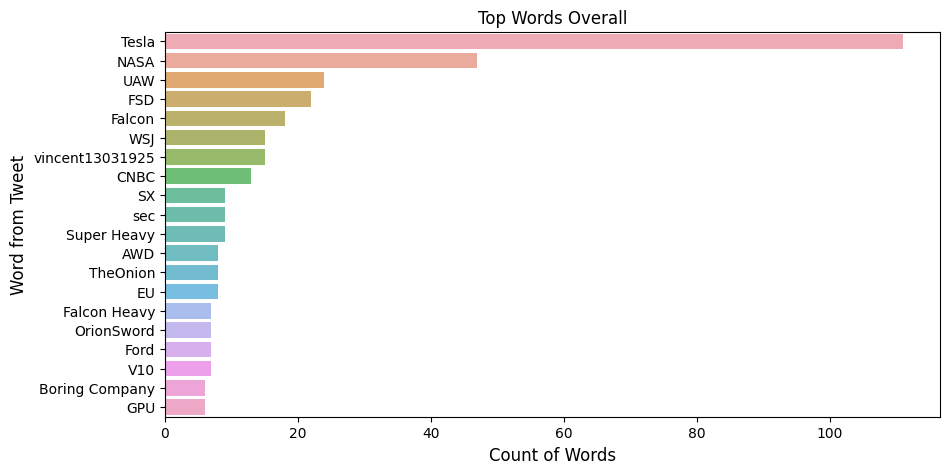

In [23]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
# sns.barplot(df.index, df[0], alpha=0.8)
sns.barplot(x = df.values, y = df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()



In [13]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()



In [14]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [15]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()


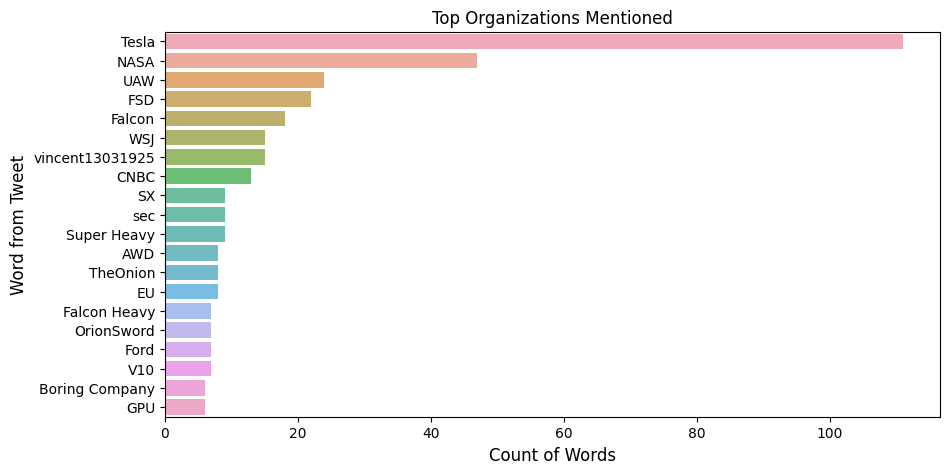

In [24]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x = df.values, y = df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [18]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()


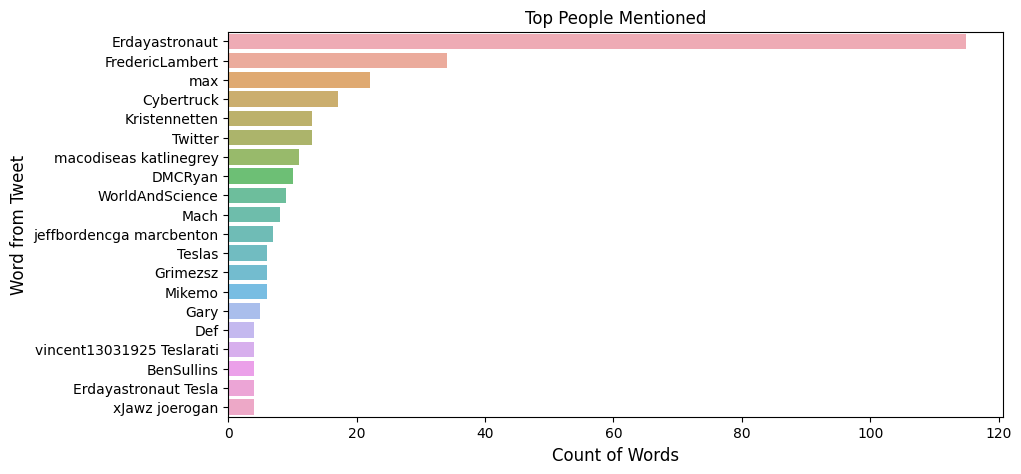

In [25]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x = df.values, y = df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()